In [1]:
# Imports 
import numpy as np
import random
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
# Parameters
n_cities = 18

n_population = 50

mutation_rate = 0.3

In [3]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])

cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}
cities_dict

{'London': [22, 91],
 'Moscow': [48, 89],
 'Barcelona': [94, 93],
 'Rome': [87, 71],
 'Paris': [48, 87],
 'Vienna': [12, 1],
 'Munich': [83, 76],
 'Istanbul': [97, 69],
 'Kyiv': [24, 96],
 'Bucharest': [68, 54],
 'Minsk': [0, 75],
 'Warsaw': [62, 96],
 'Budapest': [69, 64],
 'Milan': [96, 61],
 'Prague': [53, 78],
 'Sofia': [85, 2],
 'Birmingham': [89, 42],
 'Brussels': [19, 83]}

# 1. Create the first population set

In [4]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)

# add 'Berlin' at the first and last
cities_dict['Berlin'] = [0,0]
a = np.array(['Berlin']*50)
a = np.reshape(a,(50,1))

population_set = np.hstack((a, population_set, a))
population_set

array([['Berlin', 'Vienna', 'Budapest', 'Bucharest', 'Istanbul',
        'Warsaw', 'Birmingham', 'Barcelona', 'Moscow', 'Paris', 'London',
        'Milan', 'Kyiv', 'Brussels', 'Munich', 'Minsk', 'Rome', 'Prague',
        'Sofia', 'Berlin'],
       ['Berlin', 'Brussels', 'Istanbul', 'London', 'Milan', 'Barcelona',
        'Paris', 'Birmingham', 'Prague', 'Munich', 'Kyiv', 'Minsk',
        'Bucharest', 'Budapest', 'Warsaw', 'Rome', 'Sofia', 'Vienna',
        'Moscow', 'Berlin'],
       ['Berlin', 'Budapest', 'Milan', 'Paris', 'Brussels', 'Rome',
        'Vienna', 'Bucharest', 'Warsaw', 'Prague', 'Kyiv', 'Sofia',
        'Moscow', 'Birmingham', 'Munich', 'Istanbul', 'Barcelona',
        'Minsk', 'London', 'Berlin'],
       ['Berlin', 'Bucharest', 'Sofia', 'Rome', 'Kyiv', 'Istanbul',
        'Paris', 'Milan', 'Prague', 'Budapest', 'Brussels', 'Moscow',
        'Barcelona', 'Birmingham', 'Munich', 'Vienna', 'London', 'Minsk',
        'Warsaw', 'Berlin'],
       ['Berlin', 'Birmingham', 'Bud

# 2. Fitness Evaluation

In [5]:
# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return np.sqrt(((a[0]-b[0])**2+(a[1]-b[1])**2))

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

In [6]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [7]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list

array([ 813.0290284 ,  928.26527836,  989.6121722 ,  966.55146394,
       1056.66783807,  901.03107741, 1160.02598282,  961.19415228,
        975.09882214,  926.51576146,  954.73042337,  855.34773711,
        959.50093714, 1056.79861144,  981.28956793,  903.36760555,
        902.19406629,  890.51512489,  893.50634254,  749.14197701,
        959.29862589,  884.54941759, 1021.11515006,  888.52645744,
        975.95600235, 1015.64336287,  979.00759131, 1109.18967036,
        996.6158992 ,  948.58482495,  902.77346006,  913.67347405,
       1047.73653426,  997.63702918,  993.81817892, 1195.24877157,
       1020.89506212, 1138.57688188,  919.69822507, 1107.85107518,
        954.54028024, 1011.47813055, 1021.30704554, 1057.24960302,
        901.62453259, 1009.63862777, 1001.88160491, 1040.31958518,
        867.83883309,  952.5878646 ])

# 3. Selection

In [8]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set[:,1:-1],fitnes_list)
progenitor_list[0][2]

array(['Moscow', 'Munich', 'Sofia', 'Birmingham', 'Paris', 'Prague',
       'London', 'Rome', 'Bucharest', 'Budapest', 'Barcelona', 'Istanbul',
       'Kyiv', 'Vienna', 'Warsaw', 'Minsk', 'Brussels', 'Milan'],
      dtype='<U10')

# 4. crossover

In [9]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring
            
    
    
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
        
    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['Moscow', 'Prague', 'Warsaw', 'Kyiv', 'Barcelona', 'Brussels',
       'London', 'Minsk', 'Vienna', 'Rome', 'Birmingham', 'Istanbul',
       'Milan', 'Sofia', 'Munich', 'Budapest', 'Paris', 'Bucharest'],
      dtype='<U10')

# 5.  Mutation

In [10]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
    
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['Moscow', 'Bucharest', 'Budapest', 'Kyiv', 'Prague', 'Brussels',
       'Vienna', 'Minsk', 'London', 'Rome', 'Warsaw', 'Istanbul', 'Milan',
       'Sofia', 'Munich', 'Birmingham', 'Paris', 'Barcelona'],
      dtype='<U10')

# 6. Next generation
#### it will take 10000 iterations.

In [11]:
best_solution = [-1,np.inf,np.array([])]
for i in range(100000):
    if (i%100==0): 
        print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
        
    cities_dict['Berlin'] = [0,0]
    a = np.array(['Berlin']*50)
    a = np.reshape(a,(50,1))
    mutated_pop = np.hstack((a, mutated_pop, a))
        
        
    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)
    
    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    progenitor_list = progenitor_selection(population_set[:,1:-1],fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)

0 749.1419770130698 973.1849154440708 23/11/22 21:09
100 725.5845931488602 939.3740113682409 23/11/22 21:09
200 708.6110531960667 950.4509994832056 23/11/22 21:09
300 721.4130512095893 960.7448106375305 23/11/22 21:09
400 670.4920635785036 954.5916579440932 23/11/22 21:09
500 732.6263340144405 971.3730638048226 23/11/22 21:09
600 670.2144403058041 941.8536980930892 23/11/22 21:09
700 758.741325388175 949.5623372759932 23/11/22 21:10
800 701.6428984266686 966.019350008566 23/11/22 21:10
900 690.8347483470002 954.6899928478663 23/11/22 21:10
1000 770.2517514216923 950.6215059306741 23/11/22 21:10
1100 734.973866334059 937.9368190050831 23/11/22 21:10
1200 788.5818611376029 945.5551708057588 23/11/22 21:10
1300 646.4090323349667 948.9608933100108 23/11/22 21:10
1400 740.0232819978678 943.1150887170229 23/11/22 21:10
1500 742.7950858108334 957.654152237998 23/11/22 21:10
1600 584.5868054139484 947.4929709552255 23/11/22 21:10
1700 761.6371638302104 949.1032765472524 23/11/22 21:10
1800 702

In [12]:
best_solution

[81217,
 464.0026757491736,
 array([['Berlin', 'Vienna', 'Minsk', 'Paris', 'Brussels', 'London',
         'Kyiv', 'Warsaw', 'Milan', 'Istanbul', 'Munich', 'Budapest',
         'Bucharest', 'Birmingham', 'Barcelona', 'Rome', 'Prague',
         'Moscow', 'Sofia', 'Berlin']], dtype='<U10')]

In [18]:
best = []
for i in range(20):
    best.append(cities_dict[best_solution[2][0][i]])
    

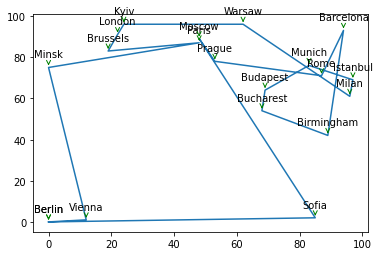

In [19]:
plt.plot(np.array(best)[:,0], np.array(best)[:,1])

#joins the x and y values
for x,y,z in zip(np.array(best)[:,0], np.array(best)[:,1], best_solution[2][0]):

    label = "{}".format(z)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='green'))

plt.show()

In [20]:
population_set[0]

array(['Berlin', 'Vienna', 'Budapest', 'Bucharest', 'Istanbul', 'Warsaw',
       'Birmingham', 'Barcelona', 'Moscow', 'Paris', 'London', 'Milan',
       'Kyiv', 'Brussels', 'Munich', 'Minsk', 'Rome', 'Prague', 'Sofia',
       'Berlin'], dtype='<U10')

In [21]:
init = []
for i in range(20):
    init.append(cities_dict[population_set[0][i]])
  

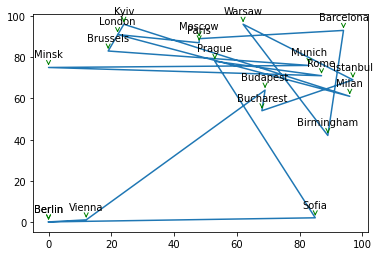

In [22]:
plt.plot(np.array(init)[:,0], np.array(init)[:,1])

#joins the x and y values
for x,y,z in zip(np.array(init)[:,0], np.array(init)[:,1], population_set[0]):

    label = "{}".format(z)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='green'))

plt.show()